# How Old Are you Compared to the Rest of the World

Fuente de datos: https://ourworldindata.org/explorers/population-and-demography?time=earliest..2025&indicator=Median+age&Sex=Both+sexes&Age=At+birth&Projection+scenario=None&country=Latin+America+and+the+Caribbean+%28UN%29~COL~OWID_WRL

In [92]:
import pandas as pd
import requests
from io import StringIO

# URL del archivo CSV
url = "https://ourworldindata.org/grapher/median-age.csv"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Validar respuesta
if response.status_code == 200:
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)
    
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV (Opcional)
    #df.to_csv("median_age.csv", index=False)
else:
    print(f"Error al descargar: {response.status_code}")

        Entity Code  Year  \
0  Afghanistan  AFG  1950   
1  Afghanistan  AFG  1951   
2  Afghanistan  AFG  1952   
3  Afghanistan  AFG  1953   
4  Afghanistan  AFG  1954   

   Median age - Sex: all - Age: all - Variant: estimates  \
0                                             18.395       
1                                             18.370       
2                                             18.333       
3                                             18.289       
4                                             18.239       

   Median age - Sex: all - Age: all - Variant: medium  
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   


In [93]:
df.head()

,Entity,Code,Year,Median age - Sex: all - Age: all - Variant: estimates,Median age - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,18.395,NaN
1,Afghanistan,AFG,1951,18.370,NaN
2,Afghanistan,AFG,1952,18.333,NaN
3,Afghanistan,AFG,1953,18.289,NaN
4,Afghanistan,AFG,1954,18.239,NaN


In [94]:
# Primero, crear la columna "Median Age" tomando estimates
df["Median Age"] = df["Median age - Sex: all - Age: all - Variant: estimates"]

# Si hay NaN en "estimates", rellenar con "medium"
df["Median Age"] = df["Median Age"].fillna(df["Median age - Sex: all - Age: all - Variant: medium"])

# Ahora seleccionar solo las columnas deseadas
df = df[["Entity", "Code", "Year", "Median Age"]]

# Filtrar solo hasta el año 2025
df = df[df["Year"] <= 2025]

# Mostrar las primeras filas para validar
df.head(10)

,Entity,Code,Year,Median Age
0,Afghanistan,AFG,1950,18.395
1,Afghanistan,AFG,1951,18.370
2,Afghanistan,AFG,1952,18.333
3,Afghanistan,AFG,1953,18.289
4,Afghanistan,AFG,1954,18.239
5,Afghanistan,AFG,1955,18.187
6,Afghanistan,AFG,1956,18.136
7,Afghanistan,AFG,1957,18.083
8,Afghanistan,AFG,1958,18.020
9,Afghanistan,AFG,1959,17.945


In [95]:
df['Year'].max()

np.int64(2025)

In [96]:
df.dtypes

Entity         object
Code           object
Year            int64
Median Age    float64
dtype: object

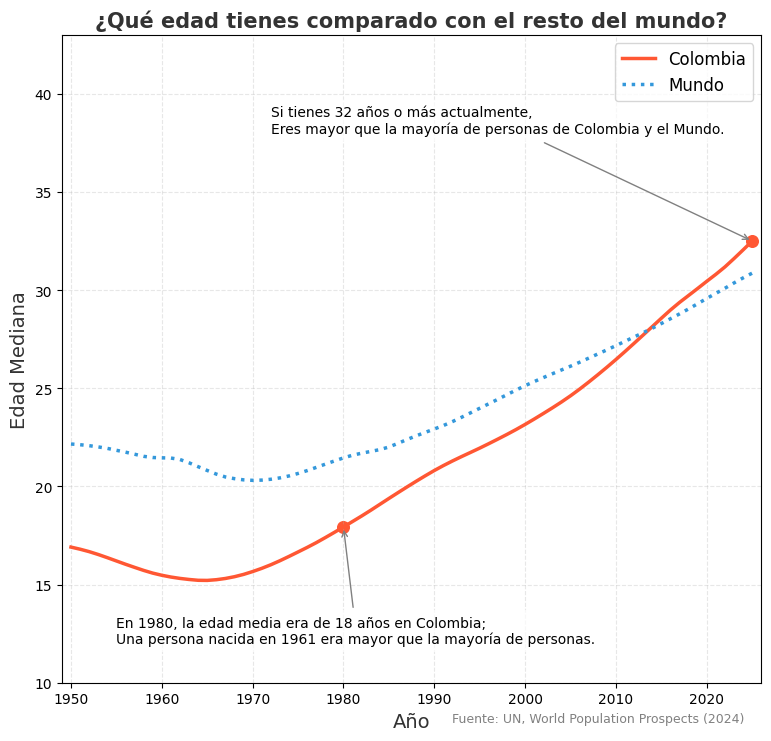

In [97]:
import matplotlib.pyplot as plt

# Filtrar Colombia y Mundo
df_filtered = df[df['Entity'].isin(['Colombia', 'World'])]

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8))  # Ligero aumento de tamaño para redes

# Graficar Colombia
colombia = df_filtered[df_filtered['Entity'] == 'Colombia']
ax.plot(colombia['Year'], colombia['Median Age'], label='Colombia', color='#FF5733', linewidth=2.5, linestyle='-')

# Graficar Mundo
world = df_filtered[df_filtered['Entity'] == 'World']
ax.plot(world['Year'], world['Median Age'], label='Mundo', color='#3498DB', linewidth=2.5, linestyle='dotted')

# Marcar puntos clave
year_1980 = 1980
median_age_1980 = colombia[colombia['Year'] == year_1980]['Median Age'].values[0]
ax.scatter(year_1980, median_age_1980, color='#FF5733', s=70)

year_2025 = 2025
median_age_2025 = colombia[colombia['Year'] == year_2025]['Median Age'].values[0]
ax.scatter(year_2025, median_age_2025, color='#FF5733', s=70)

# Anotaciones con estilo más fino
ax.annotate(
    "En 1980, la edad media era de 18 años en Colombia;\nUna persona nacida en 1961 era mayor que la mayoría de personas.",
    xy=(1980, median_age_1980),
    xytext=(1955, 12),
    arrowprops=dict(arrowstyle='->', color='gray', lw=1),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="none", alpha=0.7)
)

ax.annotate(
    "Si tienes 32 años o más actualmente,\nEres mayor que la mayoría de personas de Colombia y el Mundo.",
    xy=(2025, median_age_2025),
    xytext=(1972, 38),
    arrowprops=dict(arrowstyle='->', color='gray', lw=1),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="none", alpha=0.7)
)

# Título principal
plt.title('¿Qué edad tienes comparado con el resto del mundo?', 
          fontsize=15, fontweight='bold', loc='center', color='#333333')

# Ajustes de ejes
ax.set_xlabel('Año', fontsize=14, color='#333333')
ax.set_ylabel('Edad Mediana', fontsize=14, color='#333333')
ax.set_ylim(10, 43)
ax.set_xlim(1949, 2026)
ax.set_xticks(range(1950, 2026, 10))

# Fuente de datos
plt.text(1992, 8, 'Fuente: UN, World Population Prospects (2024)', 
         fontsize=9, color='gray', ha='left')

# Mejorar diseño general
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(fontsize=12)
ax.set_facecolor('white')

# Ajustar espacio
plt.tight_layout(rect=[0, 0, 1, 0.94])

# Mostrar
plt.show()